# Support Vector Regression (SVR) in Python using ScikitLearn

In this program we predict the salaries based on level position.

**Dataset Description**

The dataset to this model is composed by three columns and 1o row. We have one feature in the second column, Level Position. Our response is the last column, Salary. Based on the level, we construct a polynomial regression model to predict the salary for a given level position.

# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing Dataset

In [2]:

dataset = pd.read_csv('Position_Salaries.csv') #Importing the dataset and creating the dataframe
X = dataset.iloc[:, 1:-1].values # Defining the independente variable
y = dataset.iloc[:, -1].values # Defining the dependent variable

## Data Preprocessing

### Feature Scaling

In this model we need to apply feature scaling, for one simple reason, the SVR model is not a linear combination between  $X$ and $y$. There is an other trick behind the method. Then we need to have all independent variables in the same scale to make a good prediction. Note that,  in all situation that we have a linear combination between $X$ and $y$ we do not need to apply feature scaling.

In [3]:
y = y.reshape(len(y),1) # To convert this 1D array into 2D array

In [4]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

## Building the Model - Support Vector Regression (SVR)


**Definition from Scikit-Learn website**

A support vector machine constructs a hyper-plane or set of hyper-planes in a high or infinite dimensional space, which can be used for classification, regression or other tasks. Intuitively, a good separation is achieved by the hyper-plane that has the largest distance to the nearest training data points of any class (so-called functional margin), since in general the larger the margin the lower the generalization error of the classifier.

From Scikit-Learn library we have a class called Support Vector Machine that contains the object Support Vector Regression.

In [5]:
from sklearn.svm import SVR # Class and object
regressor = SVR(kernel='rbf', degree=6) # Creating the object to fit the model
regressor.fit(X,y) # Fitting the model

/home/igor/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(degree=6)

**Note**

One important aspect when we work with a Support Vector Machine is to choose the function Kernel. This function fits the model. We have some options, according with the problem some Kernel can be more efficient than others. Here we select 'RBF' kernel, it's a gaussian function. The hyper parameters must be select according with the kernel function.

Kernel types:

- Linear
- Sigmoid
- Polynomial
- RBF

## Visualizing the Results

In [6]:
# First we need to creat the variables to put the features on the original scale
X_os = sc_X.inverse_transform(X)
y_os = sc_y.inverse_transform(y)

In [7]:
# Increasing the number of points to obtain a smoother curve
X_grid = np.arange(min(X_os), max(X_os), 0.001)
X_grid = X_grid.reshape((len(X_grid), 1))
X_grid_os = sc_X.transform(X_grid)

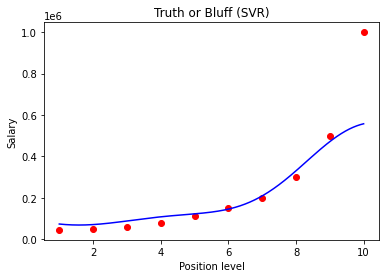

In [8]:
plt.scatter(X_os,y_os, color = 'red') # Scatter plot
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(X_grid_os)), color = 'blue') # Plotting the predicted curve
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Making a single prediction

In [9]:
print(sc_y.inverse_transform(regressor.predict(sc_X.transform([[10]]))))

[557821.75899897]


## Conclusion

This program is a simple example to demonstrate how to use a SVR model. The model is different to the linear regression and the theory behind the method is very interesting and aid to understand better. I suggest a quickly reading of it. You most also try to fit a best model using the many hyper parameters in the object SVR().
About the results, we can see that for this case, the predict curve do not reach the last point, this is a consequence of problem mathematical formulation. For this problem, this method seems not appropriate, but here we are not looking for a good precision, but a demonstration how to apply the method.